In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
 

In [ ]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 34.1MB/s]
  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 57.9MB/s]
  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 131MB/s]


In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
dataset='/content/train.csv'
df = pd.read_csv(dataset,encoding='latin1')
df.head

<bound method NDFrame.head of          id keyword  ...                                               text target
0         1     NaN  ...  Our Deeds are the Reason of this #earthquake M...      1
1         4     NaN  ...             Forest fire near La Ronge Sask. Canada      1
2         5     NaN  ...  All residents asked to 'shelter in place' are ...      1
3         6     NaN  ...  13,000 people receive #wildfires evacuation or...      1
4         7     NaN  ...  Just got sent this photo from Ruby #Alaska as ...      1
...     ...     ...  ...                                                ...    ...
7608  10869     NaN  ...  Two giant cranes holding a bridge collapse int...      1
7609  10870     NaN  ...  @aria_ahrary @TheTawniest The out of control w...      1
7610  10871     NaN  ...  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...      1
7611  10872     NaN  ...  Police investigating after an e-bike collided ...      1
7612  10873     NaN  ...  The Latest: More Homes Razed by

In [ ]:
df = df.fillna('unknown')

In [ ]:
def textpreprocessing(comp_df, col):
  # remove all the punctuation
  comp_df[col] = comp_df[col].str.replace(r'(@\w*)','')

  #Remove URL
  comp_df[col] = comp_df[col].str.replace(r"http\S+", "")

  #Remove # tag and the following words
  comp_df[col] = comp_df[col].str.replace(r'#\w+',"")

  #Remove all non-character
  comp_df[col] = comp_df[col].str.replace(r"[^a-zA-Z ]","")

  # Remove extra space
  comp_df[col] = comp_df[col].str.replace(r'( +)'," ")
  comp_df[col] = comp_df[col].str.strip()

  # Change to lowercase
  comp_df[col] = comp_df[col].str.lower()
  comp_df[col]=comp_df[col].fillna('Unknown')
  return comp_df

In [ ]:
df=textpreprocessing(df,'text')

In [ ]:
df.head

<bound method NDFrame.head of          id  keyword  ...                                               text target
0         1  unknown  ...  our deeds are the reason of this may allah for...      1
1         4  unknown  ...              forest fire near la ronge sask canada      1
2         5  unknown  ...  all residents asked to shelter in place are be...      1
3         6  unknown  ...     people receive evacuation orders in california      1
4         7  unknown  ...  just got sent this photo from ruby as smoke fr...      1
...     ...      ...  ...                                                ...    ...
7608  10869  unknown  ...  two giant cranes holding a bridge collapse int...      1
7609  10870  unknown  ...  the out of control wild fires in california ev...      1
7610  10871  unknown  ...                        m utckm s of volcano hawaii      1
7611  10872  unknown  ...  police investigating after an ebike collided w...      1
7612  10873  unknown  ...  the latest more hom

In [ ]:
df['comment']=df['keyword']+df['text']

In [ ]:
list = ['location', 'id','text','keyword']

In [ ]:
df=df.drop(list, axis=1)

In [ ]:
train=df[0:4000]
test=df[4000:]

In [ ]:
train

,target,comment
0,1,unknownour deeds are the reason of this may al...
1,1,unknownforest fire near la ronge sask canada
2,1,unknownall residents asked to shelter in place...
3,1,unknownpeople receive evacuation orders in cal...
4,1,unknownjust got sent this photo from ruby as s...
...,...,...
3995,0,floodshave you ever remembered an old song som...
3996,0,floodsfloods fishing finally sunshine amp fab ...
3997,1,floodsbengal floods cm mamata banerjee blames ...
3998,1,floodsdead due to floods in myanmar naypyidaw ...


In [ ]:
test

,target,comment
4000,1,floodswhen it rains in nj it flash floods othe...
4001,0,floodsdownload itunes floods of glory by luiz ...
4002,1,floodsyep during floods of or clyde dam releas...
4003,1,floodsbamenda floods kill animals birds
4004,0,floodsi hope it rains throughout the whole wee...
...,...,...
7608,1,unknowntwo giant cranes holding a bridge colla...
7609,1,unknownthe out of control wild fires in califo...
7610,1,unknownm utckm s of volcano hawaii
7611,1,unknownpolice investigating after an ebike col...


In [ ]:
trainX=train.drop('target',axis=1)
trainY=train['target']

In [ ]:
testX=test.drop('target',axis=1)
testY=test['target']

In [ ]:
trainX=np.array(trainX)
testX=np.array(testX)

In [ ]:
trainX

array([['unknownour deeds are the reason of this may allah forgive us all'],
       ['unknownforest fire near la ronge sask canada'],
       ['unknownall residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected'],
       ...,
       ['floodsbengal floods cm mamata banerjee blames dvc bjp claims state failed to use economic t'],
       ['floodsdead due to floods in myanmar naypyidaw aug prensa latina the death toll rose today to in myanmar'],
       ['floodstyphoon soudelor approaches after killed missing in floods in philippines via']],
      dtype=object)

In [ ]:
for i in range(5):
  print(trainX[i])

['unknownour deeds are the reason of this may allah forgive us all']
['unknownforest fire near la ronge sask canada']
['unknownall residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected']
['unknownpeople receive evacuation orders in california']
['unknownjust got sent this photo from ruby as smoke from pours into a school']


In [ ]:
trainX.ndim

2

In [ ]:
trainX=trainX.flatten()
testX=testX.flatten()

In [ ]:
print(trainX.ndim)
print(testX.ndim)

1
1


In [ ]:
vocab_size=20000
word_embed_train=[tf.keras.preprocessing.text.one_hot(i,vocab_size) for i in trainX]
word_embed_test=[tf.keras.preprocessing.text.one_hot(i,vocab_size) for i in testX]

In [ ]:
trainX=tf.keras.preprocessing.sequence.pad_sequences(word_embed_train,padding='post')
testX=tf.keras.preprocessing.sequence.pad_sequences(word_embed_test,padding='post')

In [ ]:
from tensorflow.keras.layers import Embedding

In [ ]:
embedding_size=5
model=tf.keras.models.Sequential()
model.add(Embedding(vocab_size,embedding_size,name='embedded'))
model.add(tf.keras.layers.GlobalAveragePooling1D())
#model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedded (Embedding)         (None, None, 5)           100000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 5)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 100,006
Trainable params: 100,006
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainX,trainY,validation_data=(testX,testY),epochs=30)

Epoch 1/30
125/125 [==============================] - 1s 5ms/step - loss: 0.6816 - accuracy: 0.5855 - val_loss: 0.6843 - val_accuracy: 0.5480
Epoch 2/30
125/125 [==============================] - 1s 4ms/step - loss: 0.6641 - accuracy: 0.5905 - val_loss: 0.6815 - val_accuracy: 0.5480
Epoch 3/30
125/125 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.5932 - val_loss: 0.6763 - val_accuracy: 0.5480
Epoch 4/30
125/125 [==============================] - 1s 5ms/step - loss: 0.6348 - accuracy: 0.6025 - val_loss: 0.6671 - val_accuracy: 0.5508
Epoch 5/30
125/125 [==============================] - 1s 4ms/step - loss: 0.6158 - accuracy: 0.6323 - val_loss: 0.6577 - val_accuracy: 0.5663
Epoch 6/30
125/125 [==============================] - 0s 4ms/step - loss: 0.5943 - accuracy: 0.6810 - val_loss: 0.6465 - val_accuracy: 0.6025
Epoch 7/30
125/125 [==============================] - 0s 4ms/step - loss: 0.5708 - accuracy: 0.7205 - val_loss: 0.6355 - val_accuracy: 0.6272
Epoch 

In [ ]:
weights = model.get_layer('embedded').get_weights()[0]

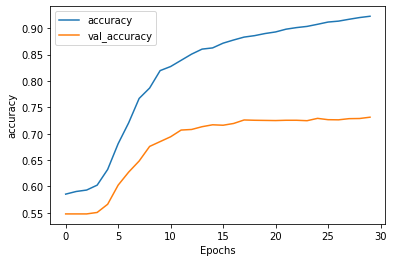

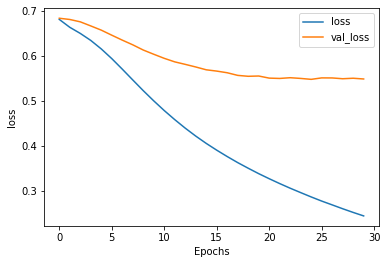

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")